In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
sns.set()

# **DATA**

In [4]:
df1 = pd.read_csv('jabodetabek_house_price.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [6]:
df1.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [7]:
df1.shape

(3553, 27)

In [8]:
df1.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


# **PREPROCESSING DATA**

## **Data Cleaning**

### Checking Missing value

In [9]:
df1.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

Berdasarkan data di atas, diketahui bahwa yang memiliki missing value adalah property_type, ads_id, bedrooms, bathrooms, land_size_m2, certificate, floors, building_age, year_built, property_condition, building_orientation, furnishing.

Maka, untuk menghilangkan missing value kita akan menggunakan mean untuk mengisi kolom yang kosong dan menghapus beberapa data yang tidak digunakan :

In [10]:
df1['certificate'].unique()

array(['shm - sertifikat hak milik', 'hgb - hak guna bangunan',
       'lainnya (ppjb,girik,adat,dll)', nan, 'hp - hak pakai'],
      dtype=object)

Informasi dari cerificate dianggap mempengaruhi harga rumah, maka akan disimpan dulu untuk nantinya menjadi feature

Kemudian untuk kolom ['ads_id','building_orientation','long','lat'] akan di drop karena dianggap tidak mempengaruhi harga rumah

In [11]:
columns_to_drop = ['ads_id','building_orientation','long','lat']
df2 = df1.drop(columns_to_drop, axis = 1)

In [12]:
df2.isnull().sum()

url                      0
price_in_rp              0
title                    0
address                  0
district                 0
city                     0
facilities               0
property_type            1
bedrooms                34
bathrooms               29
land_size_m2             2
building_size_m2         2
carports                 0
certificate            141
electricity              0
maid_bedrooms            0
maid_bathrooms           0
floors                   6
building_age          1445
year_built            1445
property_condition     246
garages                  0
furnishing             387
dtype: int64

In [13]:
print(df2['building_age'].head(20), "\n", df2['year_built'].head(20))

0     5.0
1     NaN
2     NaN
3     6.0
4     9.0
5     9.0
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    9.0
13    8.0
14    8.0
15    7.0
16    NaN
17    NaN
18    NaN
19    6.0
Name: building_age, dtype: float64 
 0     2017.0
1        NaN
2        NaN
3     2016.0
4     2013.0
5     2013.0
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    2013.0
13    2014.0
14    2014.0
15    2015.0
16       NaN
17       NaN
18       NaN
19    2016.0
Name: year_built, dtype: float64


Berdasarkan output dan diatas, dapat disimpulkan bahwa data null pada kolom 'year_built' berkorespondensi dengan data null pada kolom 'building_age' yang menyebabkan keduanya tidak dapat dicari nilainya.

dan kolom 'year_built' akan didrop karena sudah diwakilkan oleh 'building_age'

**Mengganti Missing Value Dengan Nilai Mean**

In [14]:
df2['bedrooms'].fillna(df2['bedrooms'].mean(), inplace = True)
df2['bathrooms'].fillna(df2['bathrooms'].mean(), inplace = True)
df2['land_size_m2'].fillna(df2['land_size_m2'].mean(), inplace = True)
df2['building_size_m2'].fillna(df2['building_size_m2'].mean(), inplace = True)
df2['floors'].fillna(df2['floors'].mean(), inplace = True)
df2['building_age'].fillna(df2['building_age'].mean(), inplace = True)
df2 = df2.drop('year_built', axis='columns')

In [15]:
df2.isnull().sum()

url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
facilities              0
property_type           1
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate           141
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
property_condition    246
garages                 0
furnishing            387
dtype: int64

In [16]:
df3 = df2.copy()

In [17]:
df3.isnull().sum()

url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
facilities              0
property_type           1
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate           141
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
property_condition    246
garages                 0
furnishing            387
dtype: int64

**Mengganti Missing Value Dengan Nilai Yang Paling Banyak Muncul**

In [18]:
from scipy.stats import mode
df3['property_type'].mode()

0    rumah
Name: property_type, dtype: object

In [19]:
df3['property_condition'].mode()

0    bagus
Name: property_condition, dtype: object

In [20]:
df3['furnishing'].mode()

0    unfurnished
Name: furnishing, dtype: object

In [21]:
df3['property_type'] = df3['property_type'].fillna(df3['property_type'].value_counts().index[0])
df3['property_condition'] = df3['property_condition'].fillna(df3['property_condition'].value_counts().index[0])
df3['furnishing'] = df3['furnishing'].fillna(df3['furnishing'].value_counts().index[0])
df3['certificate'] = df3['certificate'].fillna(df3['certificate'].value_counts().index[0])

In [22]:
df3.isnull().sum()

url                   0
price_in_rp           0
title                 0
address               0
district              0
city                  0
facilities            0
property_type         0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
certificate           0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
floors                0
building_age          0
property_condition    0
garages               0
furnishing            0
dtype: int64

In [23]:
df3.shape

(3553, 22)

In [24]:
df3.head()

,url,price_in_rp,title,address,district,city,facilities,property_type,bedrooms,bathrooms,...,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4.0,4.0,...,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,Taman,rumah,3.0,2.0,...,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3.0,3.0,...,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3.0,3.0,...,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4.0,3.0,...,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished


## **Data Transformation**

In [25]:
def ranking_data_by_freq(dataframe, nama_kolom):
    result = dataframe.groupby(nama_kolom)[nama_kolom].agg('count').sort_values(ascending=False)
    return result

In [26]:
ranking_data_by_freq(df3, 'district')

district
Sentul City           282
Alam Sutera           115
Gading Serpong         97
Pantai Indah Kapuk     94
BSD                    83
                     ... 
Komsen                  1
Kota Bambu Utara        1
BSD Graha Raya          1
Kramat Jati             1
patra kuningan          1
Name: district, Length: 380, dtype: int64

In [27]:
ranking_data_by_freq(df3, 'city')

city
 Bogor              881
 Tangerang          851
 Bekasi             586
 Depok              526
 Jakarta Selatan    240
 Jakarta Barat      206
 Jakarta Utara      130
 Jakarta Timur       95
 Jakarta Pusat       38
Name: city, dtype: int64

Addres merupakan data gabungan "district, city", maka akan didrop

district memiliki jenis data yang terlalu banyak, maka akan didrop

city adalah kolom alamat yang akan diambil karna terbagi baik menjadi beberapa wilayah saja

In [28]:
ranking_data_by_freq(df3, 'property_type')

property_type
rumah    3553
Name: property_type, dtype: int64

Kolom property type hanya memiliki 1 data, maka tidak diperlukan dan akan didrop

In [29]:
columns_to_drop = ['url', 'title', 'address','district','property_type','facilities']
df4 = df3.drop(columns_to_drop, axis = 1)

Karena property type hanya terdiri dari rumah, maka drop saja

In [30]:
df4.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished


**Kolom-kolom yang perlu diubah menjadi numerik**
1. Certificate
2. Electricity
3. Property Condition
4. Furnishing
5. City


**1. Certificate (df5)**

In [31]:
df5 = df4.copy()

In [32]:
ranking_data_by_freq(df5, 'certificate')

certificate
shm - sertifikat hak milik       3142
hgb - hak guna bangunan           209
lainnya (ppjb,girik,adat,dll)     201
hp - hak pakai                      1
Name: certificate, dtype: int64

Akan diubah hanya menjadi (shm, hgb, dan lainnya)

Hanya ada satu data hak pakai yang sama dengan hak guna banguana, jadi akan dirubah

In [33]:
df5['certificate'] = df5['certificate'].replace('hp - hak pakai', 'hgb - hak guna bangunan')

In [34]:
ranking_data_by_freq(df5, 'certificate')

certificate
shm - sertifikat hak milik       3142
hgb - hak guna bangunan           210
lainnya (ppjb,girik,adat,dll)     201
Name: certificate, dtype: int64

In [35]:
kolom_diubah = {'shm - sertifikat hak milik':'shm','hgb - hak guna bangunan':'hgb', 'lainnya (ppjb,girik,adat,dll)':'lainnya'}
df5['certificate'] = df5['certificate'].replace(kolom_diubah)

In [36]:
ranking_data_by_freq(df5, 'certificate')

certificate
shm        3142
hgb         210
lainnya     201
Name: certificate, dtype: int64

***Mengubah data certificate menjadi numerik***

In [37]:
dummies = pd.get_dummies(df5['certificate'])

In [38]:
dummies.head()

,hgb,lainnya,shm
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,False,True


Menggabungkan dummies dengan df5, karena kolom 'lainnya' tidak dibutuhkan maka akan didrop

dan karena sudah di trasnform, maka kolom 'certificate' juga didrop

In [39]:
df5 = pd.concat([df5,dummies], axis='columns')


In [40]:
df5 = df5.drop(['certificate','lainnya'], axis='columns')

In [41]:
df5.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing,hgb,shm
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0.0,4400 mah,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished,False,True
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1.0,2200 mah,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished,True,False
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1.0,2200 mah,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished,True,False
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0.0,3500 mah,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished,False,True
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,3500 mah,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished,False,True


**2. Electricity (df6)**

In [42]:
df6 = df5.copy()

In [43]:
ranking_data_by_freq(df6, 'electricity')

electricity
2200 mah       1390
1300 mah        807
lainnya mah     294
4400 mah        269
3500 mah        261
5500 mah        184
3300 mah         94
7700 mah         63
6600 mah         38
11000 mah        26
16500 mah        24
10000 mah        15
900 mah          14
10600 mah        14
13200 mah        12
23000 mah         7
7600 mah          7
8000 mah          6
33000 mah         5
13300 mah         4
13900 mah         4
17600 mah         3
450 mah           2
24000 mah         2
9500 mah          2
53000 mah         2
47500 mah         1
41500 mah         1
12700 mah         1
22000 mah         1
Name: electricity, dtype: int64

Menghapus ' mah' dan casting ke integer

In [44]:
n = 0
for i in df6['electricity']:
  parts = df6['electricity'][n].split(" mah")
  df6['electricity'][n] = ''.join(parts)
  n += 1

In [45]:
df6['electricity'] = df6['electricity'].apply(pd.to_numeric, errors='coerce')

Masih ada yang bernilai NaN yaitu 'lainnya' yang akan dirubah dengan nilai meannya

In [46]:
df6['electricity'].fillna(df6['electricity'].mean(), inplace = True)

In [47]:
df6.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing,hgb,shm
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0.0,4400.0,0.0,1.0,2.0,5.00000,bagus,0.0,unfurnished,False,True
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1.0,2200.0,0.0,0.0,2.0,3.88093,bagus,0.0,unfurnished,True,False
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1.0,2200.0,1.0,1.0,2.0,3.88093,bagus,1.0,unfurnished,True,False
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0.0,3500.0,1.0,1.0,2.0,6.00000,bagus sekali,2.0,unfurnished,False,True
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,3500.0,1.0,1.0,2.0,9.00000,bagus,1.0,unfurnished,False,True


**3. Property Condition (df7)**

In [48]:
df7 = df6.copy()

In [49]:
ranking_data_by_freq(df7, 'property_condition')

property_condition
bagus             1683
baru              1328
bagus sekali       261
sudah renovasi     158
butuh renovasi      94
unfurnished         25
semi furnished       4
Name: property_condition, dtype: int64

Data diatas akan dikelompokkan menjadi data interval (1-3):
1. Tidak Bagus (unfurnished, butuh renovasi, semi furnished)
2. Bagus (bagus, baru, sudah renovasi)
3. Sangat Bagus (bagus sekali)

Akan diubah dulu valuenya menjadi sesuai interval

In [50]:
kolom_diubah = {'unfurnished':1,'semi furnished':1, 'butuh renovasi':1,
                'bagus':2, 'baru':2, 'sudah renovasi':2,
                'bagus sekali':3}
df7['property_condition'] = df7['property_condition'].replace(kolom_diubah)

In [51]:
ranking_data_by_freq(df7, 'property_condition')

property_condition
2    3169
3     261
1     123
Name: property_condition, dtype: int64

In [52]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_in_rp         3553 non-null   float64
 1   city                3553 non-null   object 
 2   bedrooms            3553 non-null   float64
 3   bathrooms           3553 non-null   float64
 4   land_size_m2        3553 non-null   float64
 5   building_size_m2    3553 non-null   float64
 6   carports            3553 non-null   float64
 7   electricity         3553 non-null   float64
 8   maid_bedrooms       3553 non-null   float64
 9   maid_bathrooms      3553 non-null   float64
 10  floors              3553 non-null   float64
 11  building_age        3553 non-null   float64
 12  property_condition  3553 non-null   int64  
 13  garages             3553 non-null   float64
 14  furnishing          3553 non-null   object 
 15  hgb                 3553 non-null   bool   
 16  shm   

**4. Furnishing (df8)**


In [53]:
df8 = df7.copy()

In [54]:
ranking_data_by_freq(df8, 'furnishing')

furnishing
unfurnished       2453
semi furnished     833
furnished          238
baru                29
Name: furnishing, dtype: int64

Data diatas akan dikelompokkan menjadi data interval (1-3):

1. Unfurnished
2. Semi Furnished
3. Furnished (termasuk baru)

In [55]:
kolom_diubah = {'unfurnished':1,
                'semi furnished':2,
                'furnished':3,'baru':3}
df8['furnishing'] = df8['furnishing'].replace(kolom_diubah)

In [56]:
ranking_data_by_freq(df8, 'furnishing')

furnishing
1    2453
2     833
3     267
Name: furnishing, dtype: int64

In [57]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_in_rp         3553 non-null   float64
 1   city                3553 non-null   object 
 2   bedrooms            3553 non-null   float64
 3   bathrooms           3553 non-null   float64
 4   land_size_m2        3553 non-null   float64
 5   building_size_m2    3553 non-null   float64
 6   carports            3553 non-null   float64
 7   electricity         3553 non-null   float64
 8   maid_bedrooms       3553 non-null   float64
 9   maid_bathrooms      3553 non-null   float64
 10  floors              3553 non-null   float64
 11  building_age        3553 non-null   float64
 12  property_condition  3553 non-null   int64  
 13  garages             3553 non-null   float64
 14  furnishing          3553 non-null   int64  
 15  hgb                 3553 non-null   bool   
 16  shm   

**5. City (df9)**


In [58]:
df9 = df8.copy()

In [59]:
ranking_data_by_freq(df9, 'city')

city
 Bogor              881
 Tangerang          851
 Bekasi             586
 Depok              526
 Jakarta Selatan    240
 Jakarta Barat      206
 Jakarta Utara      130
 Jakarta Timur       95
 Jakarta Pusat       38
Name: city, dtype: int64

***Mengubah data city menjadi numerik***

In [60]:
dummies = pd.get_dummies(df9['city'].str.strip())

In [61]:
dummies

,Bekasi,Bogor,Depok,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara,Tangerang
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3548,False,False,False,False,False,False,False,False,True
3549,False,False,False,False,False,False,False,False,True
3550,False,False,False,False,False,False,False,False,True
3551,False,False,False,False,False,False,False,False,True


In [62]:
df9 = pd.concat([df9,dummies],axis='columns')
df9 = df9.drop('city', axis='columns')

In [63]:
df9.head()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,...,shm,Bekasi,Bogor,Depok,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara,Tangerang
0,2.990000e+09,4.0,4.0,239.0,272.0,0.0,4400.0,0.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False
1,1.270000e+09,3.0,2.0,55.0,69.0,1.0,2200.0,0.0,0.0,2.0,...,False,True,False,False,False,False,False,False,False,False
2,1.950000e+09,3.0,3.0,119.0,131.0,1.0,2200.0,1.0,1.0,2.0,...,False,True,False,False,False,False,False,False,False,False
3,3.300000e+09,3.0,3.0,180.0,174.0,0.0,3500.0,1.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False
4,4.500000e+09,4.0,3.0,328.0,196.0,2.0,3500.0,1.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False


**Merubah harga rumah menjadi dalam len('price_in_rp')**

In [64]:
df10 = df9.copy()

(array([3.038e+03, 2.430e+02, 1.250e+02, 5.400e+01, 4.200e+01, 8.000e+00,
        1.300e+01, 7.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

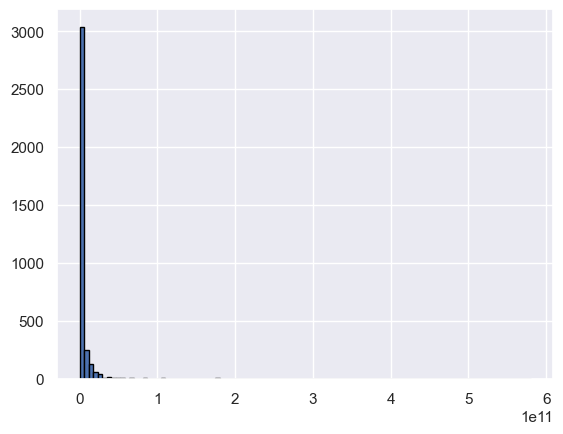

In [65]:
plt.hist(df10['price_in_rp'], bins=100, edgecolor='black')

(array([  10.,   63.,  641., 1327.,  881.,  386.,  201.,   35.,    7.,
           2.]),
 array([17.55318018, 18.50649155, 19.45980293, 20.41311431, 21.36642568,
        22.31973706, 23.27304843, 24.22635981, 25.17967119, 26.13298256,
        27.08629394]),
 <BarContainer object of 10 artists>)

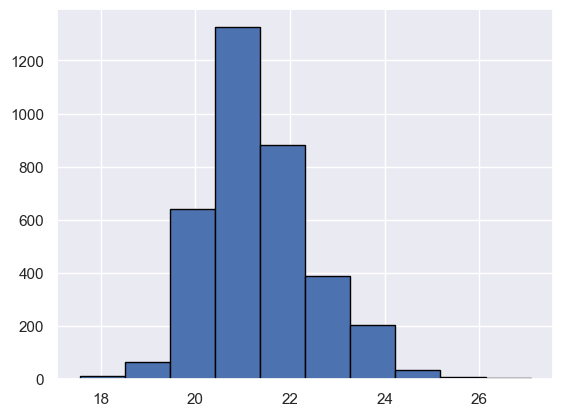

In [66]:
df10['price_in_rp'] = np.log(df10['price_in_rp'])
plt.hist(df10['price_in_rp'], edgecolor='black')

(array([   2.,   14.,  807., 1390.,  918.,  292.,   63.,   48.,   10.,
           9.]),
 array([ 6.10924758,  6.58612754,  7.0630075 ,  7.53988747,  8.01676743,
         8.49364739,  8.97052735,  9.44740731,  9.92428727, 10.40116723,
        10.87804719]),
 <BarContainer object of 10 artists>)

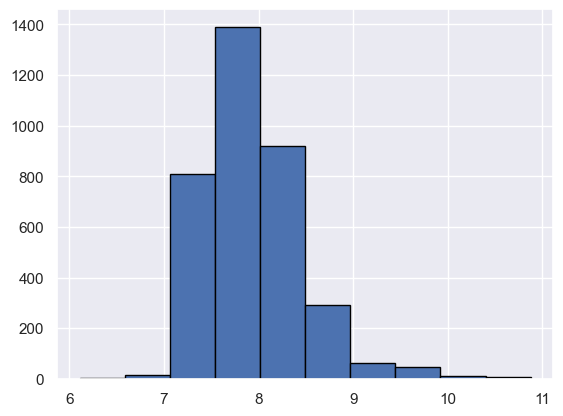

In [67]:
df10['electricity'] = np.log(df10['electricity'])
plt.hist(df10['electricity'], edgecolor='black')

(array([  26.,   85., 1093., 1279.,  598.,  297.,  114.,   36.,   14.,
          11.]),
 array([2.48490665, 3.13513567, 3.78536468, 4.4355937 , 5.08582272,
        5.73605174, 6.38628075, 7.03650977, 7.68673879, 8.3369678 ,
        8.98719682]),
 <BarContainer object of 10 artists>)

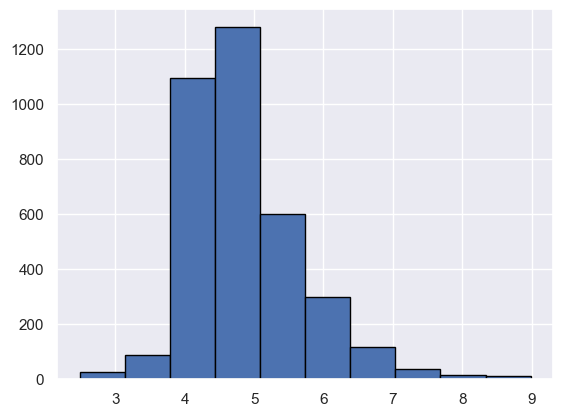

In [68]:
df10['land_size_m2'] = np.log(df10['land_size_m2'])
plt.hist(df10['land_size_m2'], edgecolor='black')

(array([1.000e+00, 0.000e+00, 0.000e+00, 3.700e+01, 1.132e+03, 1.321e+03,
        7.480e+02, 2.780e+02, 3.200e+01, 4.000e+00]),
 array([0.        , 0.86995147, 1.73990295, 2.60985442, 3.4798059 ,
        4.34975737, 5.21970885, 6.08966032, 6.9596118 , 7.82956327,
        8.69951475]),
 <BarContainer object of 10 artists>)

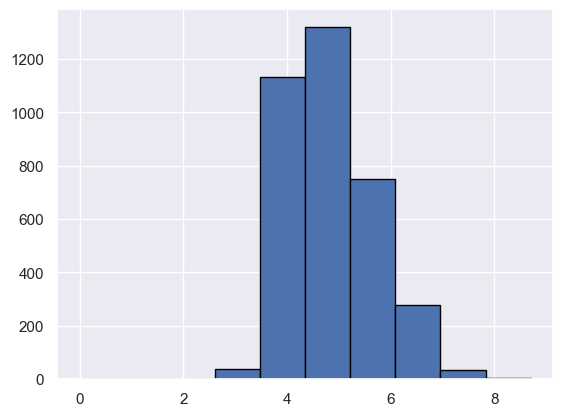

In [69]:
df10['building_size_m2'] = np.log(df10['building_size_m2'])
plt.hist(df10['building_size_m2'], edgecolor='black')

In [70]:
df10.head()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,...,shm,Bekasi,Bogor,Depok,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara,Tangerang
0,21.818539,4.0,4.0,5.476464,5.605802,0.0,8.389360,0.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False
1,20.962283,3.0,2.0,4.007333,4.234107,1.0,7.696213,0.0,0.0,2.0,...,False,True,False,False,False,False,False,False,False,False
2,21.391095,3.0,3.0,4.779123,4.875197,1.0,7.696213,1.0,1.0,2.0,...,False,True,False,False,False,False,False,False,False,False
3,21.917188,3.0,3.0,5.192957,5.159055,0.0,8.160518,1.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False
4,22.227343,4.0,3.0,5.793014,5.278115,2.0,8.160518,1.0,1.0,2.0,...,True,True,False,False,False,False,False,False,False,False


**Cek data duplikat**

In [71]:
df10.duplicated().sum()

571

In [72]:
df10.shape

(3553, 25)

In [73]:
df11 = df10.drop_duplicates()
df11.shape

(2982, 25)

In [74]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, 0 to 3551
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_in_rp         2982 non-null   float64
 1   bedrooms            2982 non-null   float64
 2   bathrooms           2982 non-null   float64
 3   land_size_m2        2982 non-null   float64
 4   building_size_m2    2982 non-null   float64
 5   carports            2982 non-null   float64
 6   electricity         2982 non-null   float64
 7   maid_bedrooms       2982 non-null   float64
 8   maid_bathrooms      2982 non-null   float64
 9   floors              2982 non-null   float64
 10  building_age        2982 non-null   float64
 11  property_condition  2982 non-null   int64  
 12  garages             2982 non-null   float64
 13  furnishing          2982 non-null   int64  
 14  hgb                 2982 non-null   bool   
 15  shm                 2982 non-null   bool   
 16  Bekasi     

Bedrooms, bathrooms, carports, maid_bedrooms, maid_bathrooms, floors, building age, garages akan diubah ke integer

In [75]:
df11[['bedrooms','bathrooms','carports','maid_bedrooms','maid_bathrooms','floors','building_age','garages']] = df11[['bedrooms','bathrooms','carports','maid_bedrooms','maid_bathrooms','floors','building_age','garages']].astype(int)

In [76]:
df11.columns

Index(['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'electricity', 'maid_bedrooms',
       'maid_bathrooms', 'floors', 'building_age', 'property_condition',
       'garages', 'furnishing', 'hgb', 'shm', 'Bekasi', 'Bogor', 'Depok',
       'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur',
       'Jakarta Utara', 'Tangerang'],
      dtype='object')

In [77]:
# Meningkatkan jumlah kolom yang ditampilkan
pd.set_option('display.max_columns', None)

# Meningkatkan lebar kolom yang ditampilkan
pd.set_option('display.width', None)

df11.describe()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,garages,furnishing
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,21.397300,3.400067,2.711938,4.906623,4.874274,1.244131,7.895358,0.528840,0.415158,1.799799,3.725352,2.046278,0.735412,1.420188
std,1.161154,2.867750,2.887210,0.819113,0.864471,1.172804,0.581414,0.701993,0.550696,0.645340,6.286092,0.347326,1.393453,0.641959
min,17.553180,1.000000,1.000000,2.484907,0.000000,0.000000,6.109248,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,20.560747,2.000000,2.000000,4.317488,4.234107,1.000000,7.696213,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,21.242060,3.000000,2.000000,4.749261,4.787492,1.000000,7.696213,0.000000,0.000000,2.000000,3.000000,2.000000,0.000000,1.000000
75%,22.107057,4.000000,3.000000,5.298317,5.456373,2.000000,8.160518,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000
max,27.086294,99.000000,99.000000,8.987197,8.699515,15.000000,10.878047,7.000000,5.000000,5.000000,152.000000,3.000000,50.000000,3.000000


In [78]:
# Reset opsi ke nilai default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [79]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, 0 to 3551
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_in_rp         2982 non-null   float64
 1   bedrooms            2982 non-null   int32  
 2   bathrooms           2982 non-null   int32  
 3   land_size_m2        2982 non-null   float64
 4   building_size_m2    2982 non-null   float64
 5   carports            2982 non-null   int32  
 6   electricity         2982 non-null   float64
 7   maid_bedrooms       2982 non-null   int32  
 8   maid_bathrooms      2982 non-null   int32  
 9   floors              2982 non-null   int32  
 10  building_age        2982 non-null   int32  
 11  property_condition  2982 non-null   int64  
 12  garages             2982 non-null   int32  
 13  furnishing          2982 non-null   int64  
 14  hgb                 2982 non-null   bool   
 15  shm                 2982 non-null   bool   
 16  Bekasi     

**Mengecek Kewajaran data**
1. Price
2. Bedrooms
3. Bathrooms
4. Land Size
5. Building Size
6. Carports
7. Electricity
8. Floors
9. Building Age
10. Year Build
11. Garages

In [80]:
nama_column = ['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'electricity', 'floors', 'building_age', 'garages']

In [81]:
def compare_graph(df1, df2, column):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
  fig.suptitle('Multiple Seaborn Plots')

  sns.boxplot(data=df1[column]).set(title=column + '-Sebelum')
  sns.boxplot(data=df2[column]).set(title=column + '-Sesudah')


  plt.show()

In [82]:
def remove_outliers(df, x, round):
  # Mereduksi outlier
  df_out = pd.DataFrame()

  m = np.mean(df[x])
  st = np.std(df[x])

  bot = np.round(m-st) if round else (m-st)
  top = np.round(m+st) if round else (m+st)

  print(f"Range: {bot} <= x <= {top}")
  # print(df.loc[~((df[x] > bot) & (df[x] <= top)), 'price_in_rp':'garages'])

  reduce_df = df[(df[x] >= bot) & (df[x] <= top)]
  df_out = pd.concat([df_out,reduce_df], ignore_index = True)

  #compare_graph(df, df_out,x)
  print(f"{len(df)} - {len(df_out)} = {len(df) - len(df_out)}")
  return df_out

In [83]:
def mean_outliers(df, x, round):
  # Mereduksi outlier
  df_out = df.copy()

  m = np.mean(df[x])
  st = np.std(df[x])

  bot = np.round(m-st) if round else (m-st)
  top = np.round(m+st) if round else (m+st)
  m = np.round(m) if round else (m)

  print(f"Range: {bot} <= x <= {top}")
  # print(df.loc[~((df[x] > bot) & (df[x] <= top)), 'price_in_rp':'garages'])
  conditions = (df[x] <= bot) | (df[x] >= top)
  df_out.loc[conditions, x] = m

  #compare_graph(df, df_out,x)
  print(f"{len(df)} - {len(df_out)} = {len(df) - len(df_out)}")
  return df

In [84]:
df12 = df11.copy()

(2982, 25)

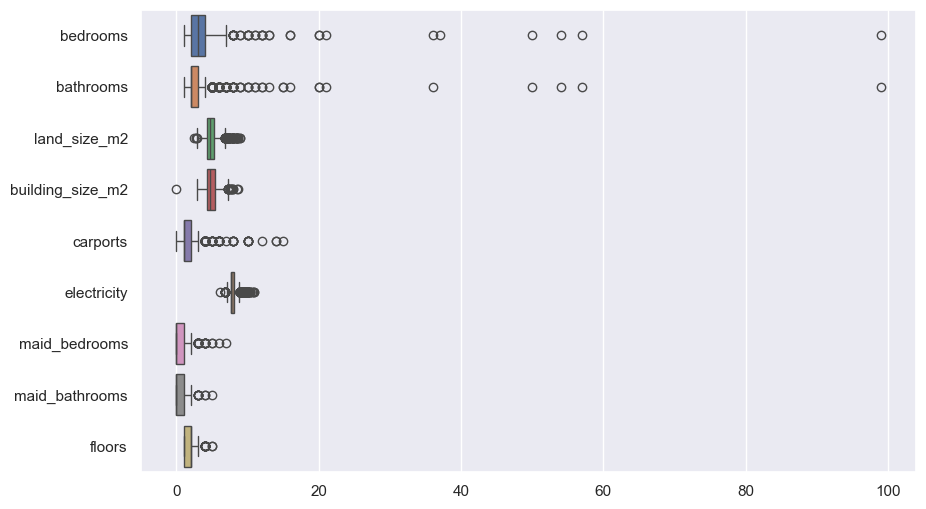

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df12.iloc[:, 1:10], orient='h')
df12.shape

Bedrooms, bathrooms, carports, maid_bedrooms, maid_bathrooms, floors

In [86]:
df12 = df12[df12['bedrooms'] <6]

In [87]:
df12 = df12[df12['bathrooms'] <5]

In [88]:
df12 = df12[df12['maid_bedrooms'] <3]

In [89]:
df12 = df12[df12['maid_bathrooms'] <3]

In [90]:
df12 = df12[df12['floors'] <4]

In [91]:
df12 = df12[df12['carports'] < 4]

(2670, 25)

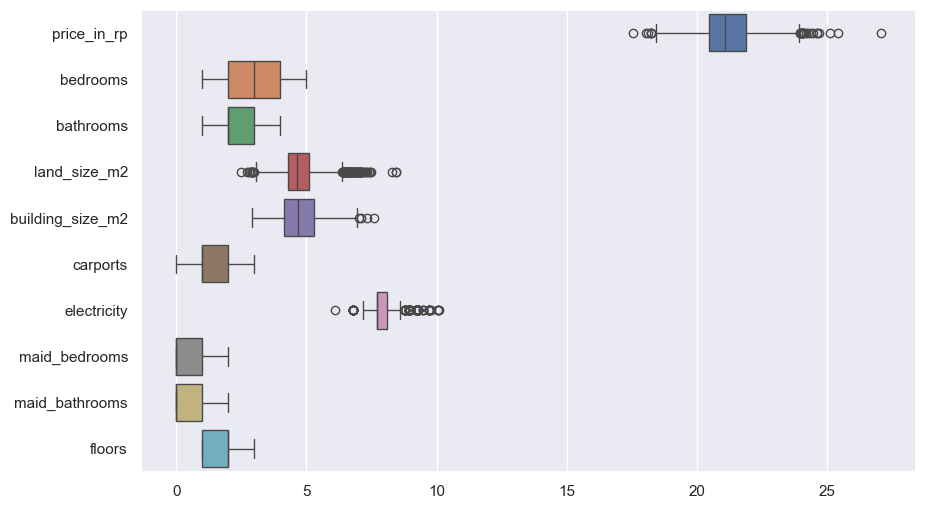

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df12.iloc[:, :10], orient='h')
df12.shape

Price, Electricity, building_size

In [93]:
df13 = df12.copy()

(2670, 25)

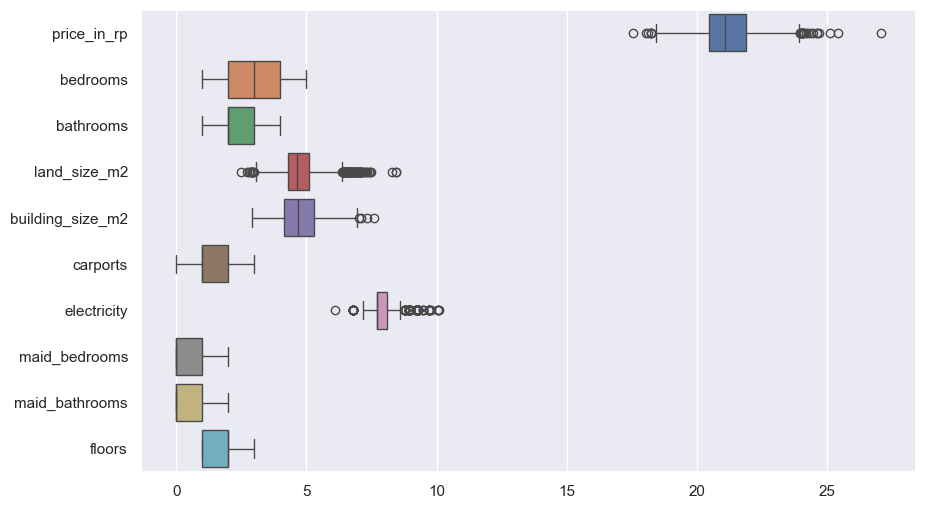

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df13.iloc[:, :10], orient='h')
df12.shape

In [95]:
df13 = df13[(df13['price_in_rp'] > 18.5) & (df13['price_in_rp'] < 23.4)]

In [96]:
df13 = df13[(df13['electricity'] > 7) & (df13['electricity'] < 8.75)]

Masih ada data outlier dari 'electricity', tapi jika dihapus akan mempengaruhi kenormalan data pada kolom yang lain, maka akan diganti dengan nilai yang sesuai dengan kondisi (luas tanah dan luas bangunan yang sesuai)

In [97]:
for i, values in enumerate(df13[df13['electricity'] > 8.6].index):
  df13['electricity'][values] = df13.loc[(df13['land_size_m2'] > (df13['land_size_m2'][values] - 0.5)) & (df13['land_size_m2'] < (df13['land_size_m2'][values] + 0.5)), 'electricity'].mean()
  print(f"{df13['electricity'][values]} dari {(df13['land_size_m2'][values] - 0.5)} < x < {(df13['land_size_m2'][values] + 0.5)}")

7.875669806192581 dari 4.5106352940962555 < x < 5.5106352940962555
8.161621657833726 dari 5.3522024797744745 < x < 6.3522024797744745
8.07561458502945 dari 5.098421958998375 < x < 6.098421958998375
7.812593033899939 dari 4.40527477843843 < x < 5.40527477843843
8.018616747489178 dari 4.875278407684165 < x < 5.875278407684165
8.073740174519022 dari 5.041263545158426 < x < 6.041263545158426
8.012287927656779 dari 4.8706380281276624 < x < 5.8706380281276624
7.986887743880238 dari 4.798317366548036 < x < 5.798317366548036
8.152642661914337 dari 5.3522024797744745 < x < 6.3522024797744745
8.170894475712927 dari 5.426926025970411 < x < 6.426926025970411
8.261957779485966 dari 5.748042874508429 < x < 6.748042874508429
8.102814207295514 dari 5.2430031878094825 < x < 6.2430031878094825
7.9313559450448325 dari 4.69295685089021 < x < 5.69295685089021
8.144270187001396 dari 5.386104031450156 < x < 6.386104031450156
7.644410075803238 dari 3.999809670330265 < x < 4.999809670330265
7.643836220856341 d

In [98]:
df13 = df13[df13['building_size_m2'] < 6.7]

(2670, 25)

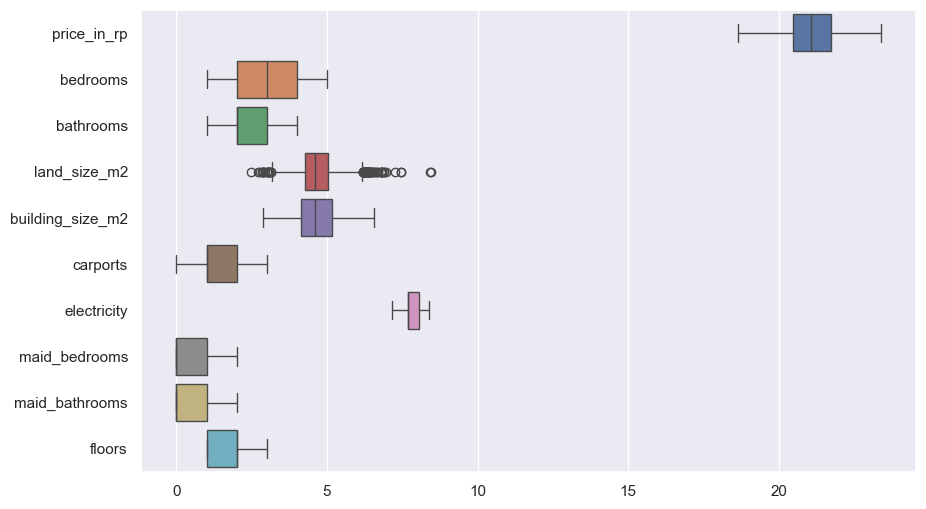

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df13.iloc[:, :10], orient='h')
df12.shape


**Land Size**



In [100]:
df14 = df13.copy()

(2509, 25)

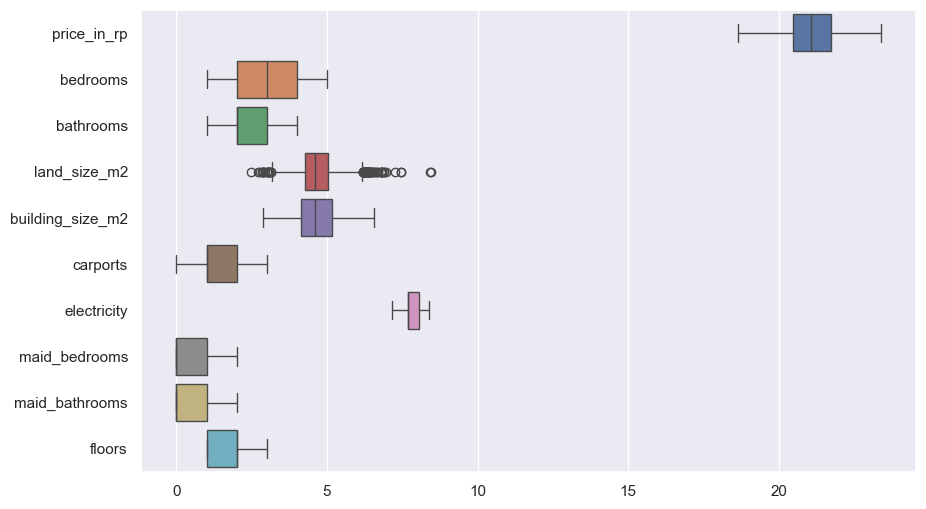

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df14.iloc[:, :10], orient='h')
df14.shape

<Axes: xlabel='land_size_m2'>

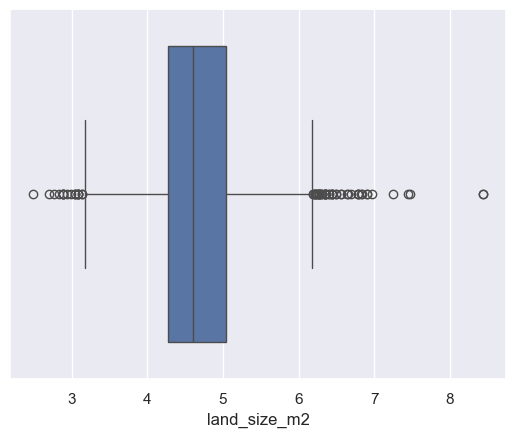

In [102]:
sns.boxplot(data=df14['land_size_m2'], orient='h')

In [103]:
df14 = df14[(df14['land_size_m2'] > 3.2) & (df14['land_size_m2'] <= 6.2)]

(2443, 25)

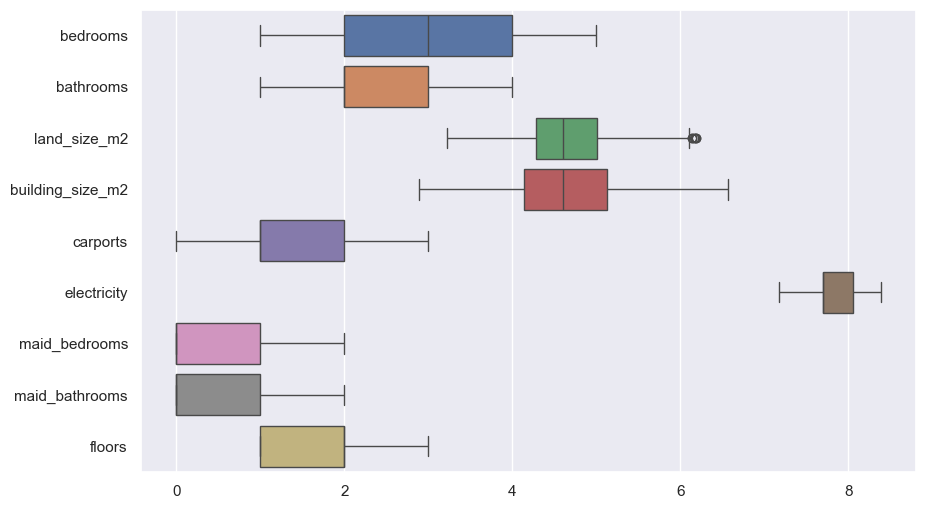

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df14.iloc[:, 1:10], orient='h')
df14.shape

**Data Sudah Dianggap Clear dan Siap Masuk Ke Tahap Selanjutnya**

In [105]:
df = df14.copy()

# EXPLORATORY DATA ANALYSIS

array([[<Axes: title={'center': 'price_in_rp'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'land_size_m2'}>],
       [<Axes: title={'center': 'building_size_m2'}>,
        <Axes: title={'center': 'carports'}>,
        <Axes: title={'center': 'electricity'}>,
        <Axes: title={'center': 'maid_bedrooms'}>],
       [<Axes: title={'center': 'maid_bathrooms'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'building_age'}>,
        <Axes: title={'center': 'property_condition'}>],
       [<Axes: title={'center': 'garages'}>,
        <Axes: title={'center': 'furnishing'}>, <Axes: >, <Axes: >]],
      dtype=object)

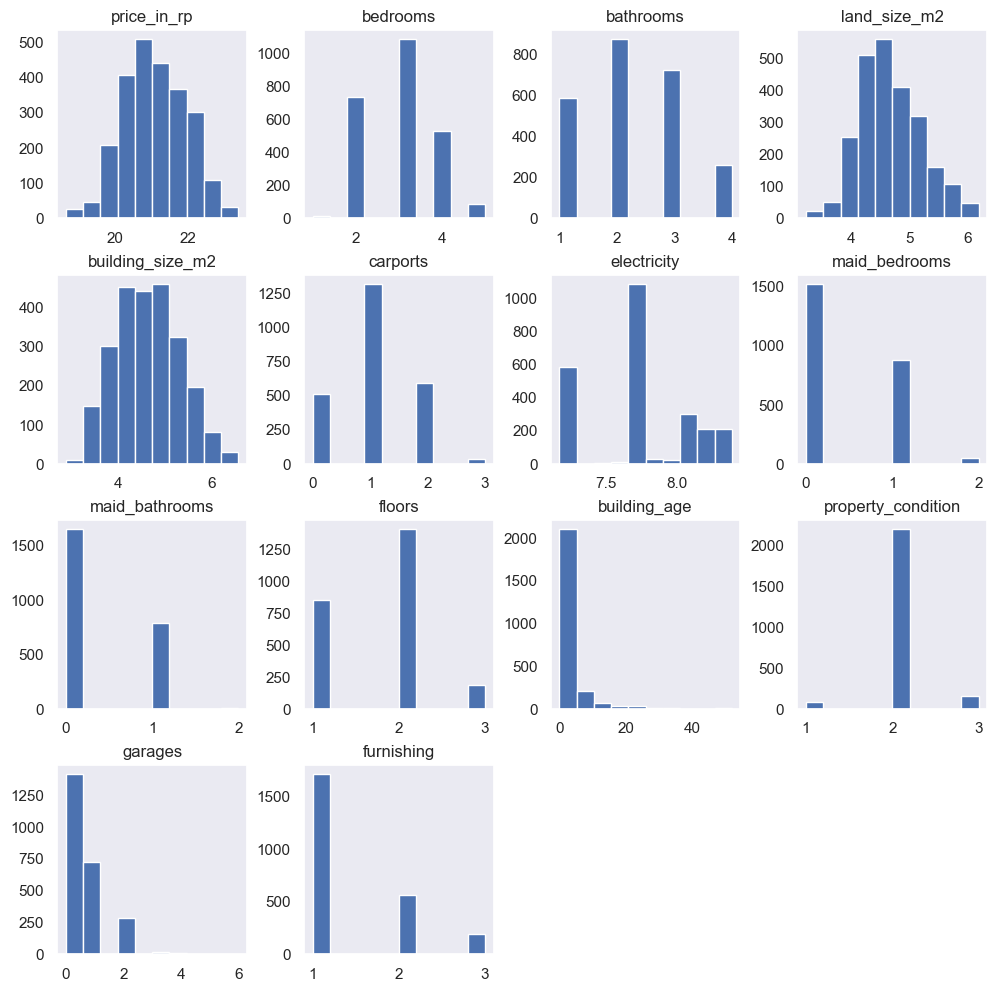

In [106]:
df.hist(grid = False, figsize = (12,12))

<Axes: >

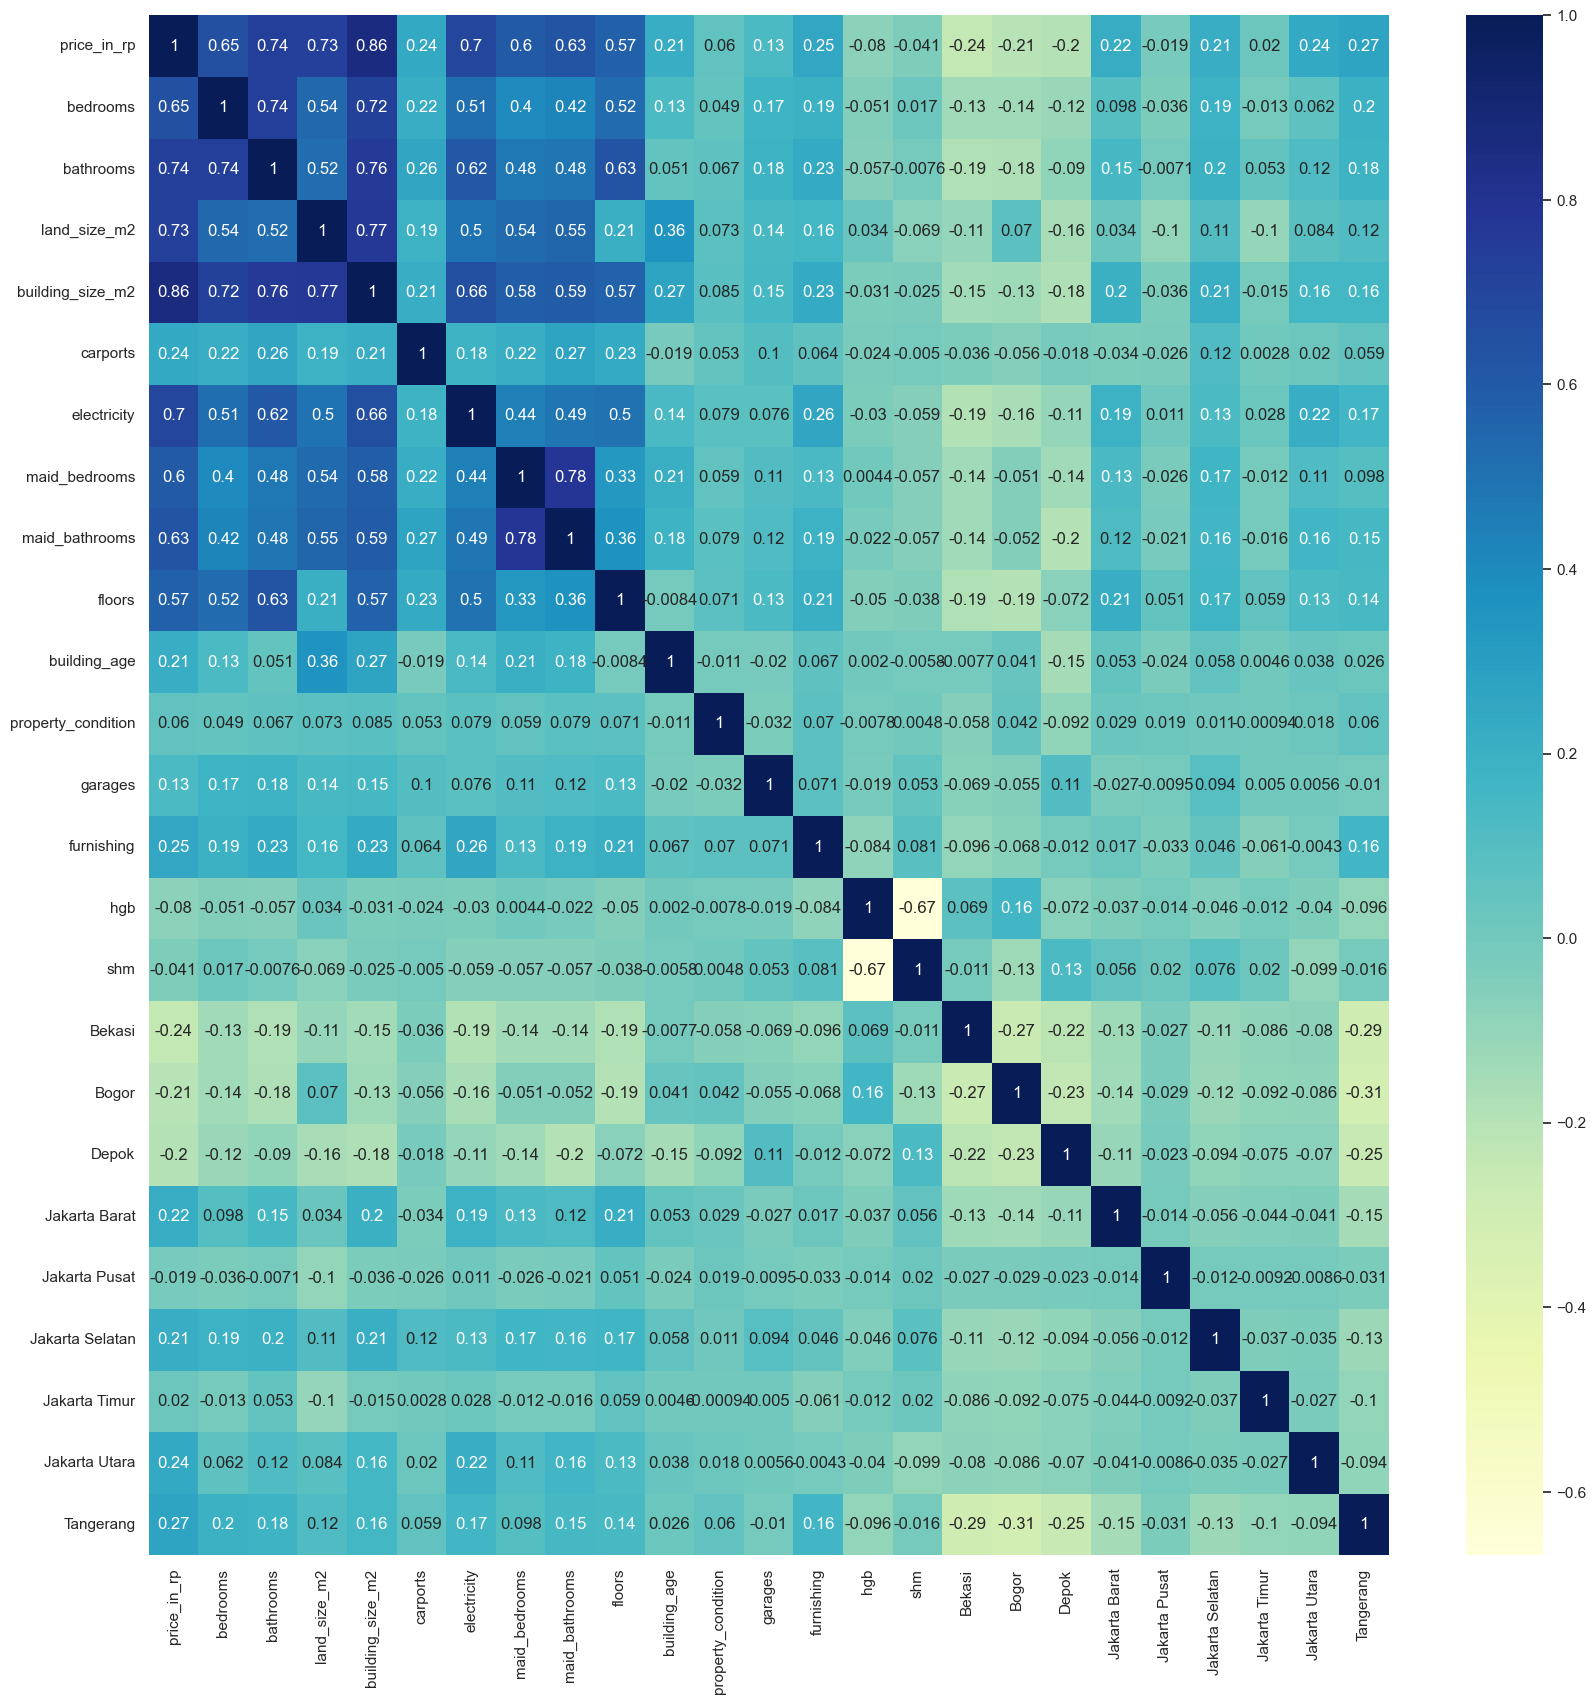

In [107]:
fig, ax = plt.subplots(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

In [108]:
df

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,...,shm,Bekasi,Bogor,Depok,Jakarta Barat,Jakarta Pusat,Jakarta Selatan,Jakarta Timur,Jakarta Utara,Tangerang
0,21.818539,4,4,5.476464,5.605802,0,8.389360,0,1,2,...,True,True,False,False,False,False,False,False,False,False
1,20.962283,3,2,4.007333,4.234107,1,7.696213,0,0,2,...,False,True,False,False,False,False,False,False,False,False
2,21.391095,3,3,4.779123,4.875197,1,7.696213,1,1,2,...,False,True,False,False,False,False,False,False,False,False
3,21.917188,3,3,5.192957,5.159055,0,8.160518,1,1,2,...,True,True,False,False,False,False,False,False,False,False
4,22.227343,4,3,5.793014,5.278115,2,8.160518,1,1,2,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,21.917188,3,3,5.529429,5.030438,1,7.696213,1,1,2,...,True,False,False,False,False,False,False,False,False,True
3538,21.161521,2,2,4.094345,4.219508,1,7.696213,0,0,2,...,True,False,False,False,False,False,False,False,False,True
3540,21.305481,2,3,3.912023,4.127134,1,8.160518,0,0,2,...,True,False,False,False,False,False,False,False,False,True
3546,20.905587,3,2,4.094345,4.356709,1,7.546005,0,0,2,...,True,False,False,False,False,False,False,False,False,True


In [109]:
df.columns

Index(['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'electricity', 'maid_bedrooms',
       'maid_bathrooms', 'floors', 'building_age', 'property_condition',
       'garages', 'furnishing', 'hgb', 'shm', 'Bekasi', 'Bogor', 'Depok',
       'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur',
       'Jakarta Utara', 'Tangerang'],
      dtype='object')

**Feature Selections**

In [110]:
X = df.drop(['price_in_rp','carports'], axis='columns')
y = df['price_in_rp']

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

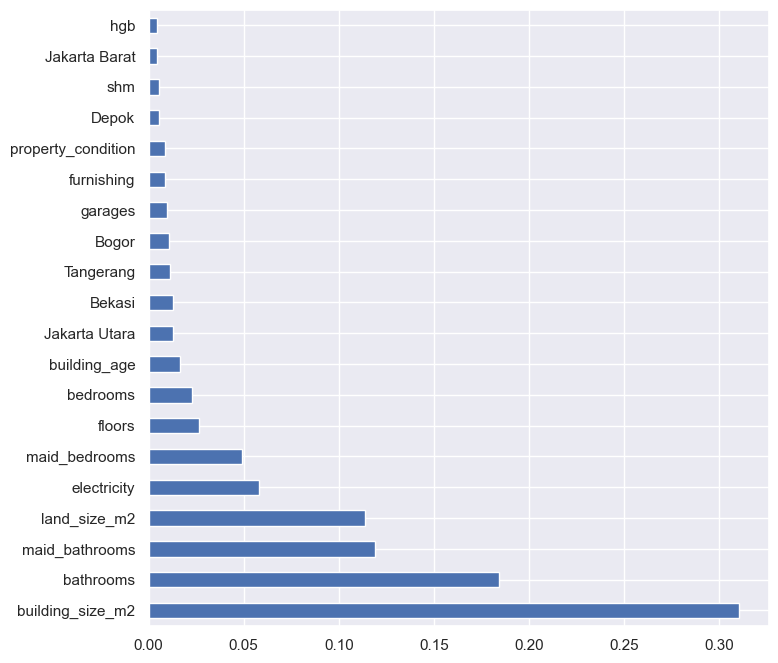

In [112]:
plt.figure(figsize = (8,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

Berdasarkan data diatas,
diambil 8 variabel yang memiliki korelasi tertinggi

In [113]:
df['electricity'].describe()

count    2443.000000
mean        7.720239
std         0.378860
min         7.170120
25%         7.696213
50%         7.696213
75%         8.058488
max         8.389360
Name: electricity, dtype: float64

In [114]:
X = df.drop(['price_in_rp','garages'], axis=1)
y = df['price_in_rp']

# MODELING

In [115]:
X.columns

Index(['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports',
       'electricity', 'maid_bedrooms', 'maid_bathrooms', 'floors',
       'building_age', 'property_condition', 'furnishing', 'hgb', 'shm',
       'Bekasi', 'Bogor', 'Depok', 'Jakarta Barat', 'Jakarta Pusat',
       'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Utara', 'Tangerang'],
      dtype='object')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.25       0.         0.27587273 ... 0.         0.         0.        ]
 [0.5        0.33333333 0.33886216 ... 0.         0.         0.        ]
 [0.         0.         0.73252004 ... 0.         0.         0.        ]
 ...
 [0.25       0.         0.30352631 ... 0.         0.         0.        ]
 [0.5        1.         0.33886216 ... 0.         0.         0.        ]
 [0.75       0.66666667 0.51534494 ... 0.         0.         0.        ]]


In [118]:
# Build the neural network model
model = Sequential()
model.add(Dense(76, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='nadam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/100

49/49 [==============================] - 3s 11ms/step - loss: 387.1824 - val_loss: 265.9167
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 95.0403 - val_loss: 15.9753
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 12.8657 - val_loss: 8.5572
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 7.3748 - val_loss: 5.4570
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 4.5327 - val_loss: 3.8110
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 3.1290 - val_loss: 2.9453
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 2.3722 - val_loss: 2.3348
Epoch 8/100
49/49 [==============================] - 0s 4ms/step - loss: 1.8485 - val_loss: 1.8448
Epoch 9/100
49/49 [==============================] - 0s 3ms/step - loss: 1.4484 - val_loss: 1.4313
Epoch 10/100
49/49 [==============================] - 0s 4ms/step - loss: 1.1429 - val_loss: 1.1070


In [119]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [120]:
# Make predictions
predictions = model.predict(X_test)

16/16 [==============================] - 0s 3ms/step


In [121]:
print_evaluate(y_test, predictions)

MAE: 0.27267618371037716
MSE: 0.12298194576858076
RMSE: 0.3506878181069037
R2 Square 0.841139698705151
__________________________________


In [122]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
percentage_accuracy = r2 * 100

print(f'R-squared: {r2}')
print(f'Percentage Accuracy: {percentage_accuracy}%')

R-squared: 0.841139698705151
Percentage Accuracy: 84.1139698705151%


# EXPORT

In [123]:
import joblib
joblib.dump(model,'jabodetabek_house_price_predict.joblib')

['jabodetabek_house_price_predict.joblib']

# IMPORT

In [124]:
loaded_model = joblib.load('jabodetabek_house_price_predict.joblib')

In [126]:
loaded_model.weights

[<tf.Variable 'dense/kernel:0' shape=(23, 76) dtype=float32, numpy=
 array([[ 0.13282679,  0.16713843,  0.11650115, ..., -0.17340751,
         -0.16822213,  0.14915974],
        [ 0.02072954,  0.19493225, -0.03195934, ..., -0.08493233,
         -0.18991446, -0.21753104],
        [-0.03137519, -0.04802025,  0.22918567, ...,  0.01724695,
         -0.03462087, -0.01449133],
        ...,
        [ 0.16176283, -0.04945366,  0.20861535, ..., -0.0648355 ,
          0.303752  ,  0.10456263],
        [ 0.16752832,  0.12214623,  0.22514404, ...,  0.06593309,
          0.31606466, -0.01042203],
        [ 0.24582744, -0.1439374 ,  0.28716072, ...,  0.16702035,
          0.22401617,  0.16687953]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(76,) dtype=float32, numpy=
 array([ 0.1181865 , -0.06259822,  0.10032184,  0.20527264,  0.01171124,
         0.18975072,  0.44348827,  0.15520458,  0.16614018, -0.04111645,
         0.13735157,  0.12257238,  0.10440253,  0.20559826,  0.11940355,
       